# Python Assignment
### By Timothy Nessel for Professor Charles X

________________________________________________________________


## Setting the environment
##### *NOTE : this code requires biopython and seaborn*

In [1]:
#Set needed environment for all future code sometimes with aliases
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline 
##Shows plots inline

## Functions

In [2]:
## 1.
##This function reads in a FASTA file and returns a dictionary of sequences by species name
def get_sequences_from_file(fasta_fn):  #Input: FASTA file in quotations 
    sequence_data_dict = {}   # Creates a dictonary,
    for record in SeqIO.parse(fasta_fn, "fasta"): # Parses out the species name from the input file, then uses the species name as the key for sequences
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq  
    return(sequence_data_dict) # The returned result is the dictonary, the sequence can be accessed by iterating through it. 

In [3]:
## 2.
##This function converts a nucleotide sequence string to an amino acid string
def translate_function(string_nucleotides): #input is a consistent string of nucleotide sequence
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #returns a table of codons to amino acid symbol (http://biopython.org/DIST/docs/tutorial/Tutorial.html)
    string_aa = ""
    for i in range(0,len(string_nucleotides),4): # i starts at 0, iterates to next codon until end of nucleotide sequence
        codon = string_nucleotides[i:i+3] #creates a codon out of a 3 length nucleotide sequence
        if codon in ["TAA","TAG","AGA","AGG"]:  #check for stop codon
            return string_aa #quit function with sequence generated so far
        aa_seq_string=aa_seq_string+mito_table.forward_table[codon] #translates the codon using provided command by Dr. X and adds it to the current total sequence
    return(string_aa) #returns a string containing the translated amino acid sequence in aa symbols 

## 3.
##This function converts a nucleotide sequence string to an amino acid string
def better_translate(string_nucleotides): #input is a consistent string of nucleotide sequence
    better_string_aa = ""
    better_string_aa=Seq.translate(string_nucleotides, table=2, to_stop=True) #translates the nucleotide sequence into amino acids, stopping at a stop codon (http://biopython.org/DIST/docs/tutorial/Tutorial.html)
    return better_string_aa #returns a string containing the translated amino acid sequence in aa symbols 

In [4]:
## 4.
##This function returns the molecular weight of an amino acid string
def compute_molecular_weight(aa_seq): #INPUT: string of an amino acid sequence, must be only amino acids
    analysed_seq = ProteinAnalysis(aa_seq) #checks if the argument is a pure amino acid sequence
    return analysed_seq.molecular_weight() #returns the molecular weight as a float
## (cite: http://biopython.org/wiki/ProtParam)

In [5]:
## 5.
##This function returns the GC content of an amino acid string
def compute_GC_content(DNA_seq): #INPUT: string of an amino acid sequence, must be only amino acids
    return GC(DNA_seq) #returns the GC content as a float, percentage between 0 and 100
## (cite: http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html)

In [6]:
## BONUS
##This function returns the aromaticity value of a protein (relative frequency of Phe+Trp+Tyr.)
def compute_aromaticity(aa_seq): #INPUT: string of an amino acid sequence
    analysed_seq = ProteinAnalysis(aa_seq)
    return analysed_seq.aromaticity() #returns the aromaticity value as a float, percentage between 0 and 100
##CITE (https://biopython.org/wiki/ProtParam)

## MAIN

In [7]:
## Read in the files and convert them to a dictionary
cytb_seqs = get_sequences_from_file('../data/bears_cytb.fasta') 
bears_df = pd.read_csv('../data/bears_mass.csv') # Create a dataframe of bear body mass and 
species_list = list(bears_df.species) # Create a new list of species names with it

In [8]:
## 6.
bears_molec_df = bears_df.copy()  #Create a copy of the original df to avoid tampering with raw data
for index, row in bears_molec_df.iterrows():   #Loop through the data frame, initializing a new column with value 'NAN'
    bears_molec_df.loc[index,'molecular_weight'] = "NaN"    #in each row
for index, row in bears_molec_df.iterrows():
    bears_molec_df.loc[index,'GC_content'] = "NaN"
for index, row in bears_molec_df.iterrows():        #BONUS
    bears_molec_df.loc[index,'Aromaticity'] = "NaN" #BONUS
bears_molec_df.head(5)  #Shows the current state of our copy

,species,mass,molecular_weight,GC_content,Aromaticity
0,Ursus spelaeus,550.800,NaN,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN,NaN


In [9]:
## 7. 
## For loop to iterate through each species represented by a row, compute statistics from cytb_seqs, 
## and write them to our previously made new columns

row = 0
for i in bears_molec_df.species:  #Gets you the names of the species in the bear df
    #Translates the sequence of the corresponding species in cytb and saves to new variable
    aa_seq = better_translate(str(cytb_seqs[i]))
    #computes the molecular weight of the new aa sequence
    molec_weight = compute_molecular_weight(aa_seq)
    #computes the GC content of the DNA sequence
    GC_seq = compute_GC_content(str(cytb_seqs[i]))
    #BONUS
    aroma = compute_aromaticity(aa_seq)
    #Write the values to the new columns
    bears_molec_df.iloc[row, bears_molec_df.columns.get_loc('molecular_weight')] = molec_weight
    bears_molec_df.iloc[row, bears_molec_df.columns.get_loc('GC_content')] = GC_seq
    bears_molec_df.iloc[row, bears_molec_df.columns.get_loc('Aromaticity')] = aroma
    row += 1
bears_molec_df.head(5)  #Shows the current state of our copy    
## CITE: (https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc)   

,species,mass,molecular_weight,GC_content,Aromaticity
0,Ursus spelaeus,550.800,42458.8,43.7719,0.139842
1,Ursus arctos,203.500,42414.7,43.7719,0.137203
2,Ursus thibetanus,99.714,42306.7,45.614,0.134565
3,Melursus ursinus,100.030,42552,45.1754,0.14248
4,Ursus americanus,110.560,42427.7,43.9474,0.137203


## Visualization 

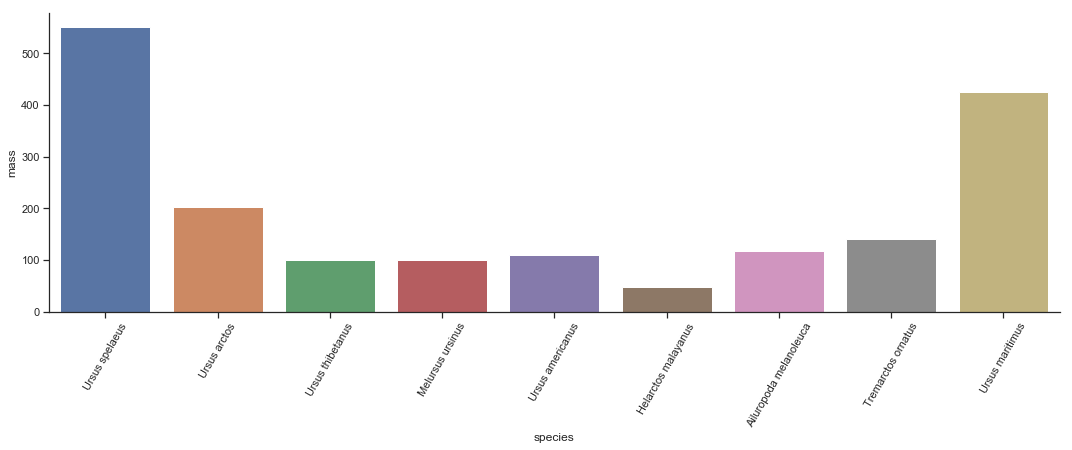

In [10]:
## 8. 
## A bar-chart plotted with seaborn of the mass with the x-axes labeled with species names.
plot_dims = (14, 9)
b = sns.catplot(x="species", y="mass", kind="bar", aspect=3, data=bears_molec_df)
b.set_xticklabels(rotation=60) #rotates the x axis labels for readability 

##CITE (https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot)

The largest bear is Ursus spelaeus: a huge, terrifying bear that I am both relieved and saddened to find out is now extinct.

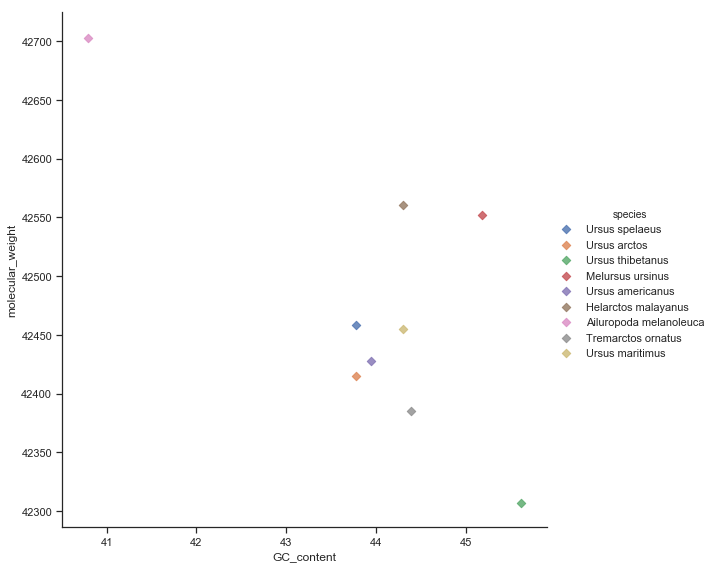

In [11]:
## 8.
## Plot with seaborn of the molecular weight (y-axis) as a function of GC-content (x-axis)
weight_GC = sns.lmplot("GC_content", "molecular_weight", data=bears_molec_df, fit_reg=False, 
                       height=8, hue='species', markers='D')

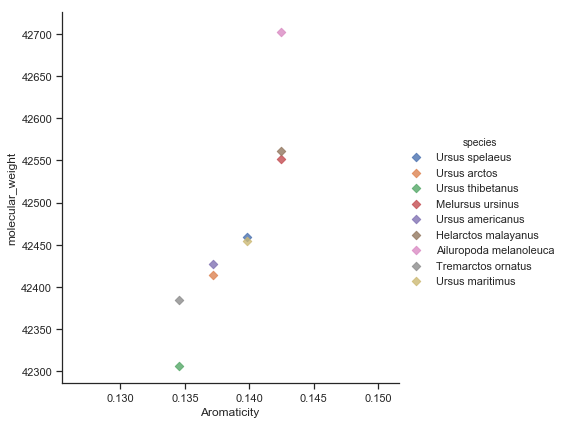

In [12]:
## BONUS 
## Plot molecular weight as a function of aromaticity 
weight_GC = sns.lmplot("Aromaticity", "molecular_weight", data=bears_molec_df, fit_reg=False, 
                       height=6, hue='species', markers='D')

## Save

In [13]:
#Write our new dataframe to a new file
bears_molec_df.to_csv('../results/bears_molecular_info.csv')